## Diffusion vs GANs

Diffusion models are a new and exciting area in computer vision that has shown impressive results in creating images. These generative models work on two stages, a forward diffusion stage and a reverse diffusion stage: first, they slightly change the input data by adding some noise, and then they try to undo these changes to get back to the original data. This process of making changes and then undoing them helps generate realistic images.

GANs were once considered state-of-the-art generative models due to the quality of their outputs but are difficult to train and prone to mode collapse, where the generator produces images from only one category, like cats or dogs, due to issues with the discriminator. Diffusion models, which have more stable training and better diversity, are now gaining attention, though they are computationally intensive and slower in inference compared to GANs.

In diffusion models, **Gaussian noise** is added step-by-step to the training images to turn them completely into junk noisy images. Through this process, the model learns to remove the noise step-by-step, hence it is capable of turning any Gaussian noisy image into a new diverse image (can also be conditioned based on text prompts).

![](https://huggingface.co/datasets/hwaseem04/Documentation-files/resolve/main/CV-Course/diffusion-process.jpg)

# diffusion variants

There are 3 major diffusion modelling frameworks

- Denoising diffusion probabilistic models (DDPMs):
  - DDPMs are models that employ latent variables to estimate the probability distribution. From this point of view, DDPMs can be viewed as a special kind of variational auto-encoders (VAEs), where the forward diffusion stage corresponds to the encoding process inside VAE, while the reverse diffusion stage corresponds to the decoding process
- Noise conditioned score networks (NCSNs):
  - It is based on training a shared neural network via score matching to estimate the score function (defined as the gradient of the log density) of the perturbed data distribution at different noise levels.
- Stochastic differential equations (SDEs):
  - It represents an alternative way to model diffusion, forming the third subcategory of diffusion models. Modeling diffusion via forward and reverse SDEs leads to efficient generation strategies as well as strong theoretical results. This can be viewed as a generalization over DDPMs and NCSNs.

  ![](https://huggingface.co/datasets/hwaseem04/Documentation-files/resolve/main/CV-Course/diffusion-sub-categories.png)

## use cases

- Image generation - Generating images based on prompts
- Image super-resolution - Increasing resolution of images
- Image inpainting - Filling up a degraded portion of an image based on prompts
- Image editing - Editing specific/entire part of the image without losing its visual identity.
- Image-to-image translation - This includes changing background, attributes of the location etc
- Learned Latent representation from diffusion models can also be used for
  - Image segmentation
  - Classification
  - Anomaly detection


## drawbacks diffusion

- Diffusion models require multiple steps for inference, leading to slow sample generation.
- Latent Consistency Models (LCMs) are a research direction aimed at speeding up inference in Latent Diffusion Models (LDMs) like Stable Diffusion with fewer steps.
- Despite these advancements, GANs are still faster at generating images.
- Diffusion models often use CLIP embeddings for text-to-image generation, but struggle to produce readable text in images.
- This limitation is linked to CLIP embeddings lacking spelling information.

# Stable Diffusion

Stable Diffusion is a generative artificial intelligence (generative AI) model that produces unique photorealistic images from text and image prompts. It originally launched in 2022 and was made possible thanks to a collaboration with Stability AI, RunwayML and CompVis Group at LMU Munich

### why stable diffusion?

The Stable Diffusion process involves several key components:

1. **Learning Strategy**: Stable Diffusion uses a forward and reverse diffusion process. In the forward process, Gaussian noise is added to an image over several steps until it becomes unrecognizable. In the reverse process, a neural network gradually denoises the image, starting from pure noise, to recover a clear image.

2. **Image Compression**: Large images require significant computing power due to the quadratic increase in operations for self-attention. To handle this, Stable Diffusion uses a Variational Auto-Encoder (VAE) to compress images, retaining essential features while reducing computational demands.

3. **Text-Image Fusion**: During inference, text prompts are converted into tokenized vectors using CLIP’s text encoder, which are then used to guide the image generation. These tokens, padded/truncated to 77 tokens, produce a representation that influences the denoising process.

4. **Inductive Biases**: U-Net and self-attention layers are used to enhance the model's ability to generate new images by incorporating cross-attention layers. These layers allow the model to reference the text prompt while predicting the denoised image, ensuring the generated image aligns with the prompt.

### text to image

In [1]:
!pip install -q diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 49.3 MB/s eta 0:00:00


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

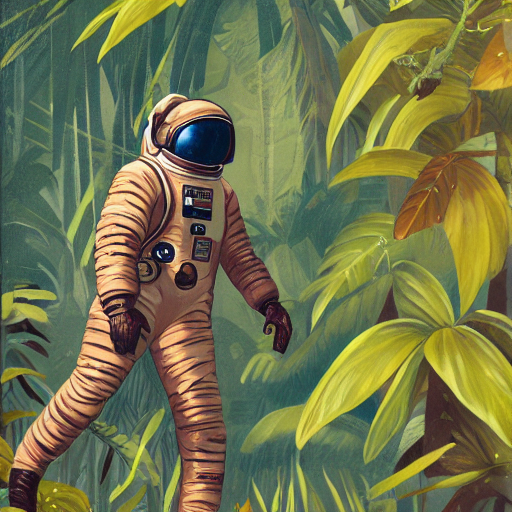

In [2]:
from diffusers import AutoPipelineForText2Image
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

pipeline = AutoPipelineForText2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16"
).to(device)

generator = torch.Generator(device=device).manual_seed(31)
image = pipeline(
    "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k",
    generator=generator,
).images[0]

image

### image-to-image

In [4]:
torch.__version__

'2.4.1+cu121'

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/kandinsky2_2/pipeline_kandinsky2_2_img2img.py:276: FutureWarning: `callback_steps` is deprecated and will be removed in version 1.0.0. Passing `callback_steps` as an input argument to `__call__` is deprecated, consider use `callback_on_step_end`
  deprecate(


  0%|          | 0/30 [00:00<?, ?it/s]

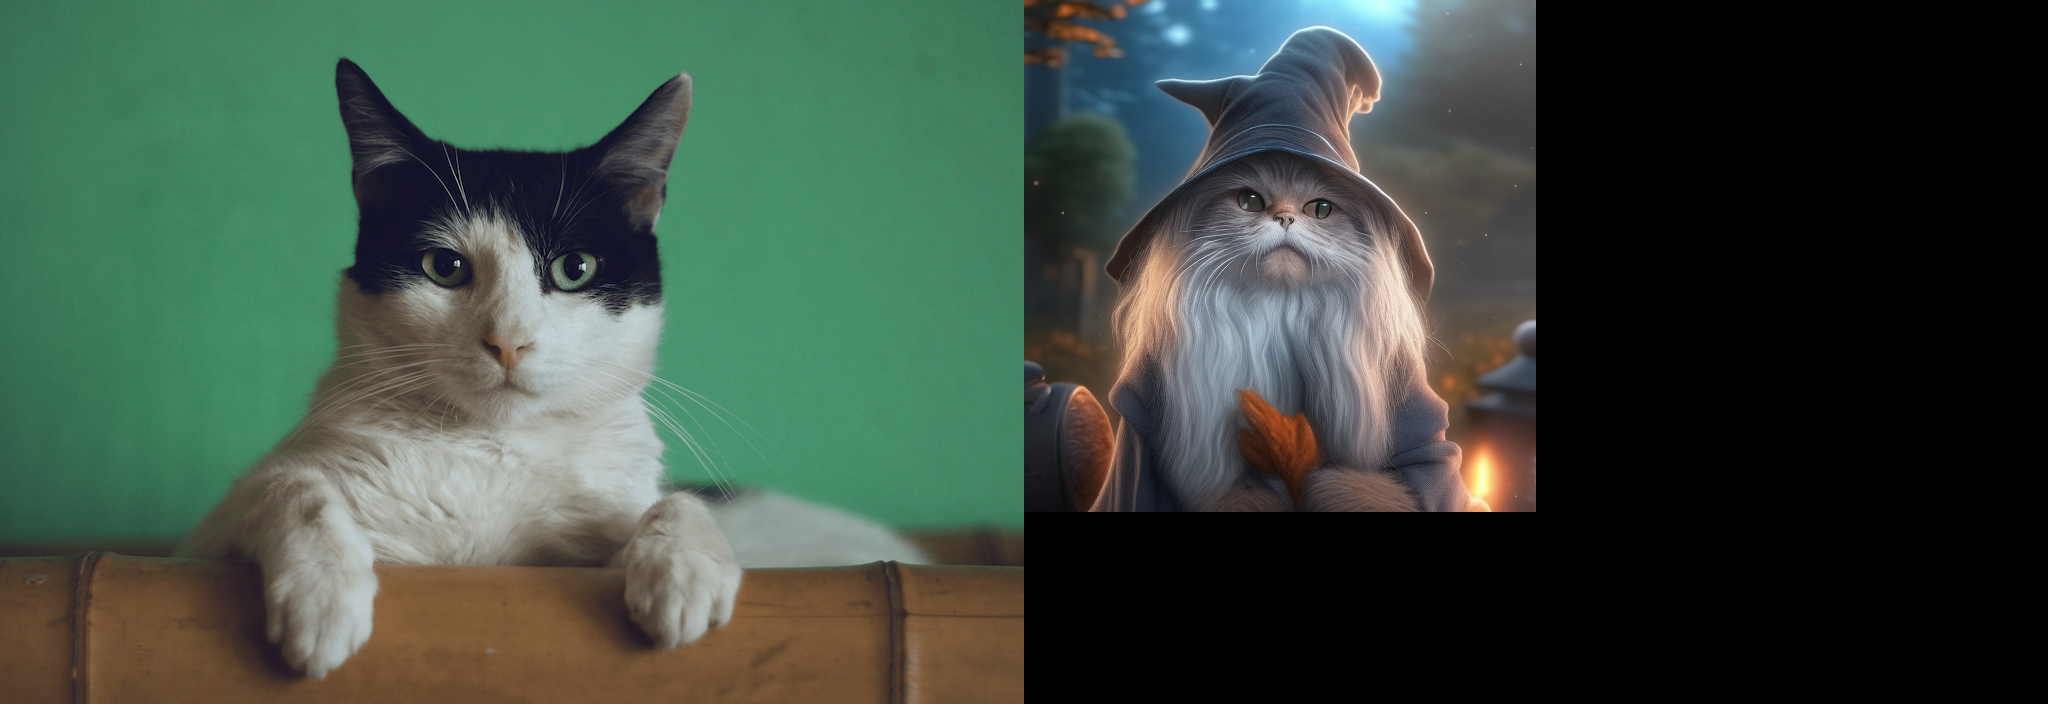

In [1]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image, make_image_grid

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "kandinsky-community/kandinsky-2-2-decoder",
    torch_dtype=torch.float16,
    use_safetensors=True,
)

pipeline.enable_model_cpu_offload()

init_image = load_image(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/cat.png"
)

prompt = "cat wizard, gandalf, lord of the rings, detailed, fantasy, cute, adorable, Pixar, Disney, 8k"
image = pipeline(prompt, image=init_image).images[0]

make_image_grid([init_image, image], rows=1, cols=2)

### inpainting

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

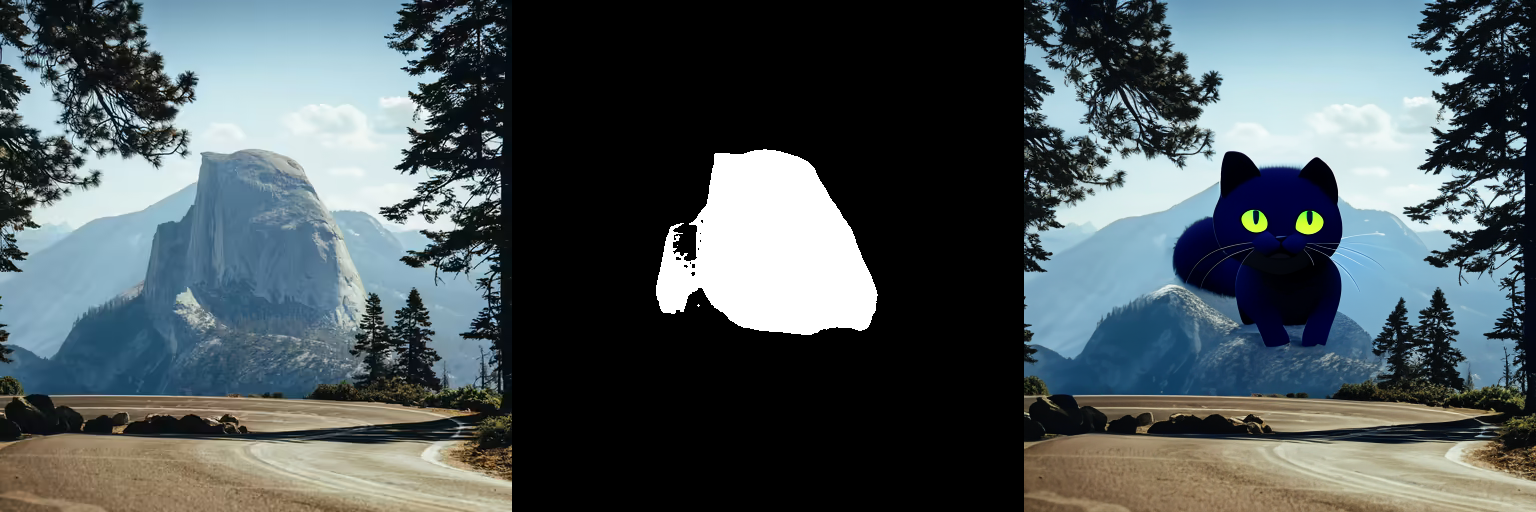

In [3]:
import torch
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image, make_image_grid

pipeline = AutoPipelineForInpainting.from_pretrained(
    "kandinsky-community/kandinsky-2-2-decoder-inpaint", torch_dtype=torch.float16
)
pipeline.enable_model_cpu_offload()

init_image = load_image(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint.png"
)
mask_image = load_image(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint_mask.png"
)

prompt = (
    "a black cat with glowing eyes, cute, adorable, disney, pixar, highly detailed, 8k"
)
negative_prompt = "bad anatomy, deformed, ugly, disfigured"

image = pipeline(
    prompt=prompt,
    negative_prompt=negative_prompt,
    image=init_image,
    mask_image=mask_image,
).images[0]

make_image_grid([init_image, mask_image, image], rows=1, cols=3)

# Control over diffusion

**dreambooth**

Although diffusion models and GANs can generate many unique images, they can’t always generate what you need exactly. Hence, you have to fine-tune a model, which usually requires a lot of data and computation. However, some techniques can be used to personalize a model with just a few examples.

One example is Dreambooth by Google Research, a training technique that updates the entire diffusion model by training on just a few images of a subject or style. It works by associating a special word in the prompt with the example images. The details on Dreambooth can be found in the [paper](https://dreambooth.github.io/) and the Hugging Face [Dreambooth training documentation](https://huggingface.co/docs/diffusers/training/dreambooth).

# **lora**

Low Rank Adaptation (LoRA). This method was initially developed to efficiently fine-tune Large Language Models. The main idea is to factorise the weight update matrix into 2 low-rank matrices, which are optimized during training whilst the rest of the model is frozen.
https://huggingface.co/docs/diffusers/training/lora

Now, if we put those ideas together we can use LoRA to efficiently fine-tune a diffusion model on a few examples using Dreambooth. A tutorial Google Colab notebook on how to do this can be found [here](https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/SDXL_DreamBooth_LoRA_.ipynb).

Due to the quality and efficiency of this method, many people have created their own LoRA parameters which many can be found on a website called [Civitai](https://civitai.com/models) and [Hugging Face](https://huggingface.co/collections/multimodalart/awesome-sdxl-loras-64f9af6d5cce4f4e8f351466). For Civitai you can download the LoRA weights which usually are in the range of 50-500MB and in the case of Hugging Face version you can just load the model directly from the model hub. Below is an example of how to load the LoRA weights in both cases and then fuse them with the model.

In [1]:
!pip install -q peft

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 4.6 MB/s eta 0:00:00


In [4]:
from diffusers import StableDiffusionXLPipeline
import torch

model = "stabilityai/stable-diffusion-xl-base-1.0"
pipe = StableDiffusionXLPipeline.from_pretrained(model, torch_dtype=torch.float16)
# pipe.load_lora_weights(
#     "lora_weights.safetensors"
# )  # if you want to install from a weight file

pipe.load_lora_weights(
    "ostris/crayon_style_lora_sdxl"
)  # if you wish to install a lora from a repository directly

pipe.fuse_lora(lora_scale=0.8) # if 1 = more influence of lora style

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

crayons_v1_sdxl.safetensors:   0%|          | 0.00/48.1M [00:00<?, ?B/s]

In [ ]:
prompt = "A beautiful landscape painting in crayon style"
image = pipe(prompt).images[0]

image.save("generated_image.png")
image.show()

https://huggingface.co/spaces/multimodalart/lora-ease

# guided diffusion with controlnet

Diffusion models can be guided in various ways, such as using prompts, negative prompts, guidance scale, and inpainting. One powerful method is **ControlNet**, introduced by Stanford University, which enhances consistency in generated images by guiding the model with specific input images containing detailed information like depth, pose, or edges.

ControlNet can be applied in both text-to-image and image-to-image tasks. For example, when using an edge-detection conditioned ControlNet, the generated images maintain a consistent shape (based on the input image) but can vary in other aspects like color, offering more control over the final output.


controlnet with SDXL: https://huggingface.co/docs/diffusers/api/pipelines/controlnet_sdxl#diffusers.StableDiffusionXLControlNetPipeline

In [2]:
!pip install -q opencv-python transformers accelerate

In [ ]:
from diffusers import StableDiffusionXLControlNetPipeline, ControlNetModel, AutoencoderKL
from diffusers.utils import load_image
import numpy as np
import torch
import cv2
from PIL import Image

prompt = "aerial view, a futuristic research complex in a bright foggy jungle, hard lighting"
negative_prompt = "low quality, bad quality, sketches"

image = load_image(
    "https://hf.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd_controlnet/hf-logo.png"
)

controlnet_conditioning_scale = 0.5  # recommended for good generalization
controlnet = ControlNetModel.from_pretrained(
    "diffusers/controlnet-canny-sdxl-1.0", torch_dtype=torch.float16
)

vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipe = StableDiffusionXLControlNetPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", controlnet=controlnet, vae=vae, torch_dtype=torch.float16
)
pipe.enable_model_cpu_offload()

# get canny image
image = np.array(image)
image = cv2.Canny(image, 100, 200)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)

image = pipe(
    prompt, controlnet_conditioning_scale=controlnet_conditioning_scale, image=canny_image
).images[0]

image

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.31k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

# Privacy, Bias and societal concerns

1. **Impact on Society**:
   - **Trust Erosion**: AI-generated deepfakes can undermine trust in media by spreading misinformation.
   - **Harassment and Defamation**: Malicious actors can use fake images to harm individuals.
   - **Unrealistic Beauty Standards**: AI-edited images may promote harmful beauty ideals, affecting self-esteem and body image.

2. **Current Approaches**:
   - **Transparency and Labeling**: Platforms are encouraged to label AI-edited content.
   - **Fact-Checking**: Fact-checking tools are being developed to verify media content.
   - **Legal Frameworks**: Governments are exploring legislation to regulate AI-edited images and prevent misuse.

3. **Future Scope**:
   - **Detection Techniques**: Ongoing research focuses on creating methods to detect AI-edited images, though it remains a constant battle between developers of manipulation tools and detection methods.
   - **Public Awareness**: Educational campaigns will help promote responsible use of AI tools and combat misinformation.
   - **Protecting Artists' Rights**: Legal challenges are arising around using artists' work in AI models without credit, leading to research on techniques like "image poisoning" to protect artist content from unauthorized use in AI training.

The field is rapidly evolving, requiring ongoing attention to emerging ethical and legal issues.